In [2]:
import pandas as pd
import numpy as np
import math
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report, mean_absolute_percentage_error

In [3]:
X_train_c = pd.read_csv("../data/classification/X_train_c.csv")
X_test_c = pd.read_csv("../data/classification/X_test_c.csv")
y_train_c = pd.read_csv("../data/classification/y_train_c.csv")
y_test_c = pd.read_csv("../data/classification/y_test_c.csv")
X_train_r = pd.read_csv("../data/regression/X_train_r.csv")
X_test_r = pd.read_csv("../data/regression/X_test_r.csv")
y_train_r = pd.read_csv("../data/regression/y_train_r.csv")
y_test_r = pd.read_csv("../data/regression/y_test_r.csv")
X_train_c.drop(columns = ["Unnamed: 0"], inplace=True)
X_test_c.drop(columns = ["Unnamed: 0"], inplace=True)
y_train_c.drop(columns = ["Unnamed: 0"], inplace=True)
y_test_c.drop(columns = ["Unnamed: 0"], inplace=True)
X_train_r.drop(columns = ["Unnamed: 0"], inplace=True)
X_test_r.drop(columns = ["Unnamed: 0"], inplace=True)
y_train_r.drop(columns = ["Unnamed: 0"], inplace=True)
y_test_r.drop(columns = ["Unnamed: 0"], inplace=True)

In [4]:
X_train_c.head()

,Flight,DayOfWeek,Time,Length,AL_9E,AL_AA,AL_AS,AL_B6,AL_CO,AL_DL,...,AT_TXK,AT_TYR,AT_TYS,AT_UTM,AT_VLD,AT_VPS,AT_WRG,AT_XNA,AT_YAK,AT_YUM
0,0.050435,0.166667,0.825752,0.083969,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.012929,0.333333,0.542337,0.274809,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.132616,0.500000,0.640308,0.106870,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.004992,0.333333,0.664801,0.091603,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.003456,0.166667,0.759272,0.114504,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X_train_r.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.943457,0.176076,-1.101291,-1.122350,-1.046903,-1.074952,-0.174238,-0.315593,1.229620,-0.588987,...,-0.334558,-0.234216,-0.118808,-0.184588,-0.567341,-0.451714,-0.422063,1.839611,-0.269103,-0.320862
1,2.964222,0.176076,-0.205550,2.334907,2.233057,2.353882,-0.174238,-0.315593,1.229620,-0.588987,...,-0.334558,-0.234216,-0.118808,-0.184588,-0.567341,2.213789,-0.422063,-0.543593,-0.269103,-0.320862
2,-0.565295,-1.225920,-0.205550,-0.438008,-0.378763,-0.544128,-0.174238,-0.315593,1.229620,-0.588987,...,-0.334558,-0.234216,-0.118808,-0.184588,-0.567341,-0.451714,-0.422063,1.839611,-0.269103,-0.320862
3,0.001949,-0.034223,0.242320,0.201895,0.167897,0.187548,-0.174238,-0.315593,-0.813259,1.697829,...,-0.334558,-0.234216,-0.118808,-0.184588,1.762607,-0.451714,-0.422063,-0.543593,-0.269103,-0.320862
4,-0.817403,-0.174423,-0.653420,-0.820173,-0.795266,-0.831060,-0.174238,-0.315593,1.229620,-0.588987,...,-0.334558,-0.234216,-0.118808,-0.184588,-0.567341,-0.451714,-0.422063,-0.543593,3.716048,-0.320862


In [6]:
model_regression = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, activation="relu", input_shape=(26,)),
        tf.keras.layers.Dense(32, activation="linear"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(1, activation="linear"),
    ]
)

In [7]:
model_regression.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1728      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,353
Trainable params: 4,353
Non-trainabl

In [8]:
model_regression.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss="mse")

In [9]:
model_regression.fit(X_train_r, y_train_r, epochs=50)

Epoch 1/50
1345/1345 [==============================] - 3s 2ms/step - loss: 2732648.0000
Epoch 2/50
1345/1345 [==============================] - 2s 2ms/step - loss: 1144837.1250
Epoch 3/50
1345/1345 [==============================] - 2s 2ms/step - loss: 1049404.0000
Epoch 4/50
1345/1345 [==============================] - 2s 2ms/step - loss: 1023959.8125
Epoch 5/50
1345/1345 [==============================] - 2s 2ms/step - loss: 1000237.9375
Epoch 6/50
1345/1345 [==============================] - 2s 2ms/step - loss: 998725.9375
Epoch 7/50
1345/1345 [==============================] - 2s 2ms/step - loss: 988542.1875
Epoch 8/50
1345/1345 [==============================] - 2s 2ms/step - loss: 1009413.9375
Epoch 9/50
1345/1345 [==============================] - 3s 2ms/step - loss: 1003020.6875
Epoch 10/50
1345/1345 [==============================] - 3s 2ms/step - loss: 971886.2500
Epoch 11/50
1345/1345 [==============================] - 2s 2ms/step - loss: 956937.3125
Epoch 12/50
1345/1345 [

In [10]:
from sklearn.metrics import r2_score


print(mean_absolute_error(y_test_r, model_regression.predict(X_test_r)))
print(mean_squared_error(y_test_r, model_regression.predict(X_test_r)))
print(mean_absolute_percentage_error(y_test_r, model_regression.predict(X_test_r)))
print(r2_score(y_test_r, model_regression.predict(X_test_r)))

337/337 [==============================] - 0s 1ms/step
315.8480482685576
337/337 [==============================] - 0s 1ms/step
1247075.1797491875
337/337 [==============================] - 0s 1ms/step
0.09936169316382151
337/337 [==============================] - 0s 1ms/step
0.9181820342080022


In [11]:
model_regression.save('../models/tensorflowregressor.h5', include_optimizer=True)

In [12]:
w0 = 1 / y_train_c[y_train_c==0].shape[0]
w1 = 1 / y_train_c[y_train_c==1].shape[0]

In [14]:
model_classification_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(256, activation="relu", input_shape=(608,)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.05),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(16, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model_classification_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss="binary_crossentropy")
model_classification_1.fit(X_train_c, y_train_c, epochs=25,
                           class_weight={0: w0, 1: w1})

Epoch 1/25
14978/14978 [==============================] - 44s 3ms/step - loss: 1.3002e-06
Epoch 2/25
14978/14978 [==============================] - 47s 3ms/step - loss: 1.2626e-06
Epoch 3/25
14978/14978 [==============================] - 48s 3ms/step - loss: 1.2415e-06
Epoch 4/25
14978/14978 [==============================] - 48s 3ms/step - loss: 1.2252e-06
Epoch 5/25
14978/14978 [==============================] - 51s 3ms/step - loss: 1.2121e-06
Epoch 6/25
14978/14978 [==============================] - 51s 3ms/step - loss: 1.2001e-06
Epoch 7/25
14978/14978 [==============================] - 53s 4ms/step - loss: 1.1898e-06
Epoch 8/25
14978/14978 [==============================] - 56s 4ms/step - loss: 1.1802e-06
Epoch 9/25
14978/14978 [==============================] - 62s 4ms/step - loss: 1.1707e-06
Epoch 10/25
14978/14978 [==============================] - 63s 4ms/step - loss: 1.1626e-06
Epoch 11/25
14978/14978 [==============================] - 62s 4ms/step - loss: 1.1540e-06
Epoch 12

In [15]:
y_pred = np.around(model_classification_1.predict(X_test_c))

3745/3745 [==============================] - 15s 4ms/step


In [16]:
print(classification_report(y_test_c, y_pred))
print(confusion_matrix(y_test_c, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69     59808
           1       0.69      0.73      0.71     60016

    accuracy                           0.70    119824
   macro avg       0.70      0.70      0.70    119824
weighted avg       0.70      0.70      0.70    119824

[[40147 19661]
 [16038 43978]]


In [17]:
model_regression.save('../models/RegressionModel')
model_classification_1.save('../models/ClassificationModel1')

INFO:tensorflow:Assets written to: ../models/RegressionModel\assets


INFO:tensorflow:Assets written to: ../models/RegressionModel\assets


INFO:tensorflow:Assets written to: ../models/ClassificationModel1\assets


INFO:tensorflow:Assets written to: ../models/ClassificationModel1\assets


😑


In [4]:
def sigmoid(Lin_func):
    Act_func = 1/(1+np.exp(-Lin_func))
    
    return Act_func

def relu(Lin_func):
    Act_func = np.maximum(0,Lin_func)
    
    return Act_func

def tanh(Lin_func):
    Act_func = np.tanh(Lin_func)

    return Act_func

In [5]:
def relu_backward(dA, Lin_func):
    
    dLin_func = np.array(dA, copy=True)
    
    dLin_func[Lin_func <= 0] = 0
    
    return dLin_func

def sigmoid_backward(dA, Lin_func):
    
    s = 1/(1+np.exp(-Lin_func))
    dLin_func = dA * s * (1-s)
    
    return dLin_func

def tanh_backward(dA, Lin_func):
    
    t = (np.exp(Lin_func) - np.exp(-Lin_func)) / (np.exp(Lin_func) + np.exp(-Lin_func))
    dLin_func = dA * (1 - pow(t, 2))
    
    return dLin_func

In [6]:
def initialize_parameters(layer_dims):
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) 

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.0001
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

In [7]:
def lin_forward(Act_func, W, b):
    Lin_func = W @ Act_func + b

    cache = (Act_func, W, b)
    
    return Lin_func, cache

In [8]:
def activate_forward(A_prev, W, b, activation=None):
    
    if activation == "sigmoid":
        Lin_func, linear_cache = lin_forward(A_prev, W, b)
        Act_func = sigmoid(Lin_func)
        activation_cache = Lin_func
    
    elif activation == "relu":
        Lin_func, linear_cache = lin_forward(A_prev, W, b)
        Act_func  = relu(Lin_func)
        activation_cache = Lin_func
    
    elif activation == "tanh":
        Lin_func, linear_cache = lin_forward(A_prev, W, b)
        Act_func  = tanh(Lin_func)
        activation_cache = Lin_func
    
    elif activation == None:
        Lin_func, linear_cache = lin_forward(A_prev, W, b)
        Act_func  = Lin_func
        activation_cache = Lin_func
        
    cache = (linear_cache, activation_cache)

    return Act_func, cache

In [9]:
def forward_prop(X, parameters, activations):

    caches = []
    Act_func = X
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = Act_func 
        Act_func, cache = activate_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activations[l-1])
        caches.append(cache)
        
    
    AL, cache = activate_forward(Act_func, parameters['W' + str(L)], parameters['b' + str(L)], activations[L-1])
    caches.append(cache)
    
          
    return AL, caches

In [10]:
def compute_cost_r(AL, Y):

    cost = mean_absolute_error(Y, AL)
    
    cost = np.squeeze(cost)

    return cost

In [11]:
def compute_cost_c(AL, Y):
    
    m = Y.shape[1]

    cost = - (Y @ np.log(AL).T + (1 - Y) @ np.log(1 - AL).T) / (m + 1e-30)
    
    cost = np.squeeze(cost)

    return cost

In [12]:
def lin_backward(dLin_func, cache):
    
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = dLin_func @ A_prev.T / m
    db = np.sum(dLin_func, axis=1, keepdims=True) / m
    dA_prev = W.T @ dLin_func
    
    return dA_prev, dW, db

In [13]:
def activate_backward(dA, cache, activation=None):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = lin_backward(dZ, linear_cache)

    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = lin_backward(dZ, linear_cache)

    elif activation == "tanh":
        dZ = tanh_backward(dA, activation_cache)
        dA_prev, dW, db = lin_backward(dZ, linear_cache)

    elif activation == None:
        dZ = dA
        dA_prev, dW, db = lin_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [14]:
def backward_prop(AL, Y, caches, activations, type):

    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    if type == 'c':
        dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    elif type == 'r':
        dAL = AL
    
    
    current_cache = caches[L-1]
    dA_prev_temp, dW_temp, db_temp = activate_backward(dAL, current_cache, activations[L-1])
    grads["dAct_func" + str(L-1)] = dA_prev_temp
    grads["dW" + str(L)] = dW_temp
    grads["db" + str(L)] = db_temp
    
    
    for l in reversed(range(L-1)):
        
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = activate_backward(dA_prev_temp, current_cache, activations[l-1])
        grads["dAct_func" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [15]:
def update_parameters(params, grads, learning_rate):

    parameters = params.copy()
    L = len(parameters) // 2

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - \
            learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - \
            learning_rate * grads["db" + str(l+1)]

    return parameters


In [16]:
class Neural_net:
    def __init__(self, X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False, activations=[]):
        self.X = X
        self.Y = Y
        self.layers_dims = layers_dims
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.print_cost = print_cost
        self.activations = activations

    def fit(self, type):

        if len(self.activations) != len(self.layers_dims) - 1:
            self.activations = ['relu' for i in range(self.layers_dims - 1)]
            if type == 'c':
                self.activations.append('sigmoid')
            elif type == 'r':
                self.activations.append(None)
        
        np.random.seed(1)
        costs = []
        
        self.parameters = initialize_parameters(self.layers_dims)
        
        for i in range(0, self.num_iterations):
            
            AL, caches = forward_prop(self.X, self.parameters, self.activations)

            if type == 'c':
                cost = compute_cost_c(AL, self.Y)
            elif type == 'r':
                cost = compute_cost_r(AL, self.Y)

            grads = backward_prop(AL, self.Y, caches, self.activations, type)
            
            self.parameters = update_parameters(self.parameters, grads, self.learning_rate)
            
            if self.print_cost and i % 100 == 0 or i == self.num_iterations - 1:
                print("epoch {}________________________ {}".format(i, np.squeeze(cost)))
            if i % 100 == 0 or i == self.num_iterations:
                costs.append(cost)

    
    def predict_c(self, X, y):
    
        m = X.shape[1]
        n = len(self.parameters) // 2
        p = np.zeros((1,m))
        
        probas, caches = forward_prop(X, self.parameters, self.activations)

        for i in range(0, probas.shape[1]):
            if probas[0,i] > 0.5:
                p[0,i] = 1
            else:
                p[0,i] = 0
        
        print("accuracy - "  + str(np.sum((p == y)/m)))
            
        return p
    
    def predict_r(self, X, y):
    
        m = X.shape[1]
        n = len(self.parameters) // 2
        
        preds, caches = forward_prop(X, self.parameters, self.activations)
        
        print(f"MAE - {mean_absolute_error(y, preds)}")
            
        return preds

In [17]:
X_train_c = np.array(X_train_c).T
X_test_c = np.array(X_test_c).T
y_train_c = np.array(y_train_c).T
y_test_c = np.array(y_test_c).T

In [18]:
layers_dims = np.array([X_train_c.shape[0], 5, 4, 1])
activations = np.array(['relu', 'relu', 'sigmoid'])

In [19]:
net_c = Neural_net(X_train_c[:1000], y_train_c[:1000], layers_dims, print_cost=True, num_iterations = 500, activations=activations)

In [39]:
net_c.fit('c')

epoch 0________________________ 1.1404967954977956
epoch 100________________________ 0.9366534840930443
epoch 200________________________ 0.8322564190911432
epoch 300________________________ 0.7762846526927686
epoch 400________________________ 0.7452480012195049
epoch 499________________________ 0.7276474048766164


In [40]:
pred_c = net_c.predict_c(X_test_c[:1000], y_test_c[:1000])

accuracy - 0.5201295233008415


In [20]:
X_train_r = np.array(X_train_r).T
X_test_r = np.array(X_test_r).T
y_train_r = np.array(y_train_r).T
y_test_r = np.array(y_test_r).T

In [21]:
layers_dims = np.array([X_train_r.shape[0], 64, 32, 16, 1])
activations = np.array(['relu', None, 'relu', None])

In [32]:
net_r = Neural_net(X_train_r[:100], y_train_r[:100], layers_dims, print_cost=True, num_iterations = 500, activations=activations, learning_rate=1)

In [33]:
net_r.fit('r')

epoch 0________________________ 3944.8832345765077
epoch 100________________________ 3944.8832345765077
epoch 200________________________ 3944.8832345765077
epoch 300________________________ 3944.8832345765077
epoch 400________________________ 3944.8832345765077
epoch 499________________________ 3944.8832345765077


In [34]:
pred_r = net_r.predict_r(X_test_r[:1000], y_test_r[:1000])
pred_r

MAE - 3885.793568175481


array([[ 3.09515041e-14, -4.65943716e-14,  2.00117891e-14, ...,
         1.32540620e-15, -3.88911325e-14,  1.18898288e-14]])

In [35]:
def conv_single_step(a_slice_prev, W, b):
    
    s = a_slice_prev * W
    Z = np.sum(s)
    Z += float(b)

    return Z

In [36]:
def conv_forward(A_prev, W, b, hparameters):

    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f, f, n_C_prev, n_C) = W.shape

    stride = hparameters['stride']
    pad = hparameters['pad']

    n_H = int((n_H_prev - f + 2*pad) / stride) + 1
    n_W = int((n_W_prev - f + 2*pad) / stride) + 1

    Z = np.zeros((m, n_H, n_W, n_C))

    A_prev_pad = np.pad(A_prev, ((0,0), (pad, pad), (pad, pad), (0,0)), mode='constant', constant_values = (0,0))

    for i in range(m):
      a_prev_pad = A_prev_pad[i]
      for h in range(n_H):
        vert_start = h * stride
        vert_end = vert_start + f
        for w in range(n_W):
          horiz_start = w * stride
          horiz_end = horiz_start + f
          for c in range(n_C):
            a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
            weights = W[:, :, :, c]
            biases = b[:, :, :, c]
            Z[i, h, w, c] = conv_single_step(a_slice_prev, weights, biases)

    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [37]:
def conv_backward(dZ, cache):

    (A_prev, W, b, hparameters) = cache
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    (f, f, n_C_prev, n_C) = W.shape
    stride = hparameters['stride']
    pad = hparameters['pad']
    (m, n_H, n_W, n_C) = dZ.shape

    dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))
    dW = np.zeros((f, f, n_C_prev, n_C))
    db = np.zeros((1, 1, 1, n_C))

    a_prev_pad = np.pad(A_prev, ((0,0), (pad, pad), (pad, pad), (0,0)), mode='constant', constant_values = (0,0))
    da_prev_pad = np.pad(dA_prev, ((0,0), (pad, pad), (pad, pad), (0,0)), mode='constant', constant_values = (0,0))

    for i in range(m):
      for h in range(n_H):
        for w in range(n_W):
          for c in range(n_C):
            vert_start = h * stride
            vert_end = vert_start + f
            horiz_start = w * stride
            horiz_end = horiz_start + f

            a_slice = a_prev_pad[i, vert_start:vert_end, horiz_start:horiz_end, :]

            da_prev_pad[i, vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
            dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
            db[:,:,:,c] += dZ[i, h, w, c]
      dA_prev[i, :, :, :] = da_prev_pad[i, pad:-pad, pad:-pad, :]
    
    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
    
    return dA_prev, dW, db

In [38]:
from sklearn.metrics import accuracy_score


class Conv_neural_net:
    def __init__(self):
        pass

    def fit(self, X, Y, layers_dims, learning_rate = 0.075, num_iterations = 10, print_cost=True, activations=[], stride = 1, pad = 2, kern_size = 4):
        self.X = X
        self.Y = Y
        self.layers_dims = layers_dims
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.print_cost = print_cost
        self.activations = activations
        self.hparameters = {'stride': stride, 'pad': pad}

        self.W = np.random.randn(kern_size, kern_size, self.X.shape[3], 1) * 0.001
        self.b = np.zeros((1, 1, 1, 1))
        
        np.random.seed(1)
        costs = []

        n_H = int((self.X.shape[1] - kern_size + 2 * pad) / stride) + 1
        n_W = int((self.X.shape[2] - kern_size + 2 * pad) / stride) + 1

        self.layers_dims = np.append([n_H * n_W], self.layers_dims)
        
        self.parameters = initialize_parameters(self.layers_dims)
        
        for i in range(0, self.num_iterations):

            Conv_out, conv_cache = conv_forward(self.X, self.W, self.b, self.hparameters)
            Conv_out = Conv_out.reshape((n_H * n_W, self.X.shape[0]))
            
            AL, caches = forward_prop(Conv_out, self.parameters, self.activations)

            cost = compute_cost_c(AL, self.Y)

            grads = backward_prop(AL, self.Y, caches, self.activations, 'c')
            
            dX, dW, db = conv_backward(grads["dAct_func0"].reshape((self.X.shape[0], n_H, n_W, 1)), conv_cache)

            self.W -= dW
            self.b -= db
            
            self.parameters = update_parameters(self.parameters, grads, self.learning_rate)
            
            if self.print_cost:
                print("epoch {}________________________ {}".format(i, np.squeeze(cost)))
            costs.append(cost)

    
    def predict(self, X, y):
    
        m = X.shape[0]
        n = len(self.parameters) // 2
        p = np.zeros((1,m))

        Conv_out, conv_cache = conv_forward(self.X, self.W, self.b, self.hparameters)
        Conv_out = Conv_out.reshape((self.layers_dims[0], self.X.shape[0]))
        
        probas, caches = forward_prop(Conv_out, self.parameters, self.activations)

        for i in range(0, probas.shape[1]):
            if probas[0,i] > 0.5:
                p[0,i] = 1
            else:
                p[0,i] = 0
        
        p = p.astype(int)
        
        print(accuracy_score(y.flatten(), p.flatten()))
            
        return p

In [39]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/cat_dog", 
    validation_split=0.2, 
    subset="both", 
    seed=42, 
    image_size=(100,100), 
    batch_size=64, 
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Using 400 files for validation.


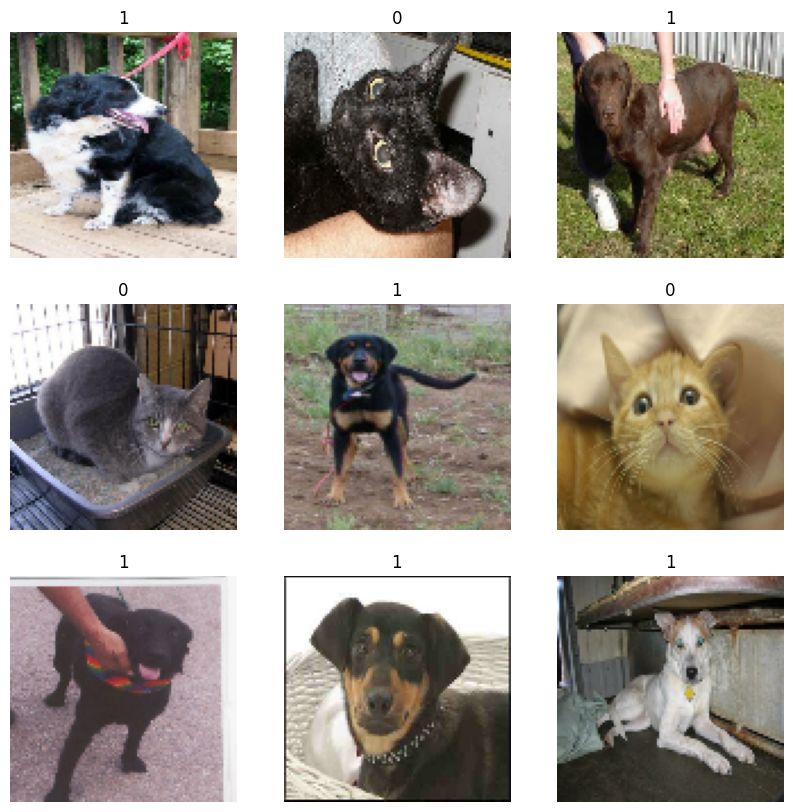

In [40]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [41]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
    ]
)

In [42]:
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label)
)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [43]:
inputs = tf.keras.Input(shape=(100, 100, 3))
x = tf.keras.layers.Rescaling(1.0 / 255)(inputs)
x = tf.keras.layers.Conv2D(32, 3, strides=2, padding="same")(x)
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
x = tf.keras.layers.Conv2D(32, 4, strides=2, padding="same")(x)
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation="sigmoid")(x)
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)

In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [45]:
model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
25/25 [==============================] - 2s 69ms/step - loss: 0.6910 - accuracy: 0.5537 - val_loss: 0.6550 - val_accuracy: 0.6250
Epoch 2/10
25/25 [==============================] - 2s 69ms/step - loss: 0.6701 - accuracy: 0.5888 - val_loss: 0.6398 - val_accuracy: 0.6725
Epoch 3/10
25/25 [==============================] - 2s 69ms/step - loss: 0.6341 - accuracy: 0.6587 - val_loss: 0.5928 - val_accuracy: 0.6750
Epoch 4/10
25/25 [==============================] - 2s 69ms/step - loss: 0.6013 - accuracy: 0.6969 - val_loss: 0.5355 - val_accuracy: 0.7350
Epoch 5/10
25/25 [==============================] - 2s 65ms/step - loss: 0.5785 - accuracy: 0.7038 - val_loss: 0.5299 - val_accuracy: 0.7175
Epoch 6/10
25/25 [==============================] - 2s 65ms/step - loss: 0.5673 - accuracy: 0.7125 - val_loss: 0.5358 - val_accuracy: 0.7125
Epoch 7/10
25/25 [==============================] - 2s 70ms/step - loss: 0.5690 - accuracy: 0.7125 - val_loss: 0.5251 - val_accuracy: 0.7175
Epoch 8/10
25

In [47]:
img = tf.keras.preprocessing.image.load_img(
    "../data/etyum.jpg", target_size=(100, 100)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
predictions

1/1 [==============================] - 0s 18ms/step


array([[0.03063413, 0.96936584]], dtype=float32)

In [49]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/101_ObjectCategories", 
    validation_split=0.15, 
    subset="both", 
    seed=42, 
    image_size=(224,224), 
    batch_size=32, 
)

Found 209 files belonging to 3 classes.
Using 178 files for training.
Using 31 files for validation.


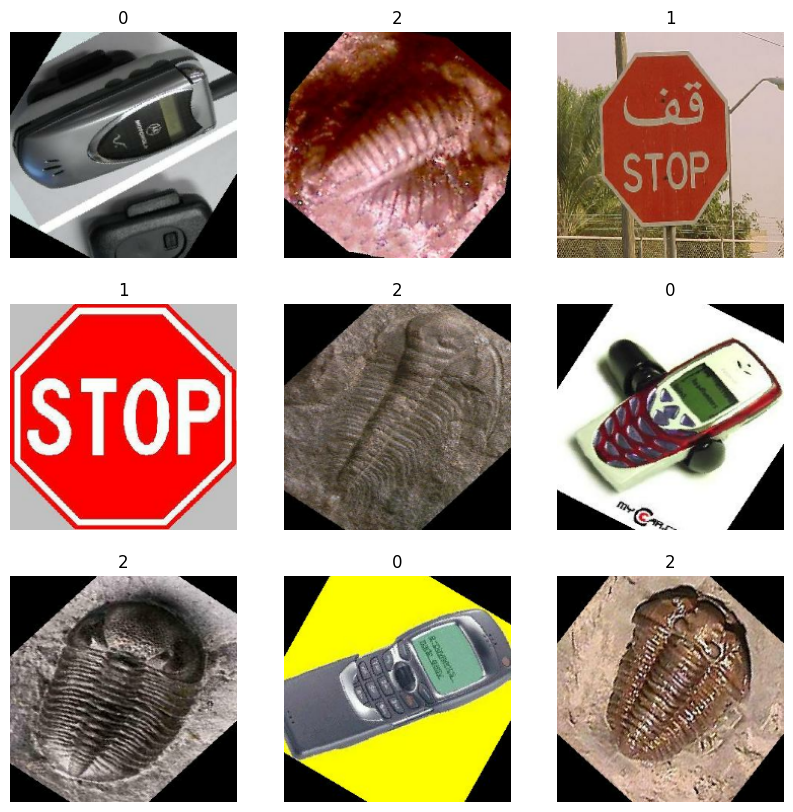

In [50]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [51]:
vgg = tf.keras.applications.VGG19(weights='imagenet', include_top=True)

574710816/574710816 [==============================] - 52s 0us/step


In [52]:
inp = vgg.input

new_classification_layer = tf.keras.layers.Dense(3, activation='softmax')

out = new_classification_layer(vgg.layers[-2].output)

model_new = tf.keras.Model(inp, out)

In [53]:
for layer in model_new.layers:
    layer.trainable = False
model_new.layers[-1].trainable = True

In [54]:
model_new.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
model_new.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
6/6 [==============================] - 19s 3s/step - loss: 0.6086 - accuracy: 0.7528 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 2/5
6/6 [==============================] - 18s 3s/step - loss: 0.0305 - accuracy: 0.9944 - val_loss: 4.3927e-04 - val_accuracy: 1.0000
Epoch 3/5
6/6 [==============================] - 18s 3s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 2.9451e-04 - val_accuracy: 1.0000
Epoch 4/5
6/6 [==============================] - 18s 3s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 2.9266e-04 - val_accuracy: 1.0000
Epoch 5/5
6/6 [==============================] - 18s 3s/step - loss: 6.3679e-04 - accuracy: 1.0000 - val_loss: 2.8995e-04 - val_accuracy: 1.0000


In [56]:
img = tf.keras.preprocessing.image.load_img(
    "../data/mobile.jpg", target_size=(224, 224)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_new.predict(img_array)
predictions

1/1 [==============================] - 0s 291ms/step


array([[9.9999714e-01, 2.6495877e-08, 2.9146217e-06]], dtype=float32)

In [57]:
inc = tf.keras.applications.InceptionV3(weights='imagenet', include_top=True)

96112376/96112376 [==============================] - 9s 0us/step


In [58]:
inp = inc.input

new_classification_layer = tf.keras.layers.Dense(3, activation='softmax')

out = new_classification_layer(inc.layers[-2].output)

model_new = tf.keras.Model(inp, out)

In [59]:
for layer in model_new.layers:
    layer.trainable = False
model_new.layers[-1].trainable = True

In [64]:
model_new.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/101_ObjectCategories", 
    validation_split=0.15, 
    subset="both", 
    seed=42, 
    image_size=(299,299), 
    batch_size=32, 
)

Found 209 files belonging to 3 classes.
Using 178 files for training.
Using 31 files for validation.


In [66]:
model_new.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
6/6 [==============================] - 12s 2s/step - loss: 9.4448 - accuracy: 0.2921 - val_loss: 4.0418 - val_accuracy: 0.5161
Epoch 2/5
6/6 [==============================] - 8s 1s/step - loss: 4.1255 - accuracy: 0.4775 - val_loss: 2.9918 - val_accuracy: 0.5484
Epoch 3/5
6/6 [==============================] - 8s 1s/step - loss: 2.7130 - accuracy: 0.6573 - val_loss: 1.4551 - val_accuracy: 0.7097
Epoch 4/5
6/6 [==============================] - 8s 1s/step - loss: 1.8717 - accuracy: 0.7416 - val_loss: 1.5705 - val_accuracy: 0.7742
Epoch 5/5
6/6 [==============================] - 8s 1s/step - loss: 1.3997 - accuracy: 0.7753 - val_loss: 1.1126 - val_accuracy: 0.7742


In [67]:
img = tf.keras.preprocessing.image.load_img(
    "../data/mobile.jpg", target_size=(299, 299)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_new.predict(img_array)
predictions

1/1 [==============================] - 1s 1s/step


array([[1.4717572e-12, 1.0000000e+00, 2.3602168e-22]], dtype=float32)

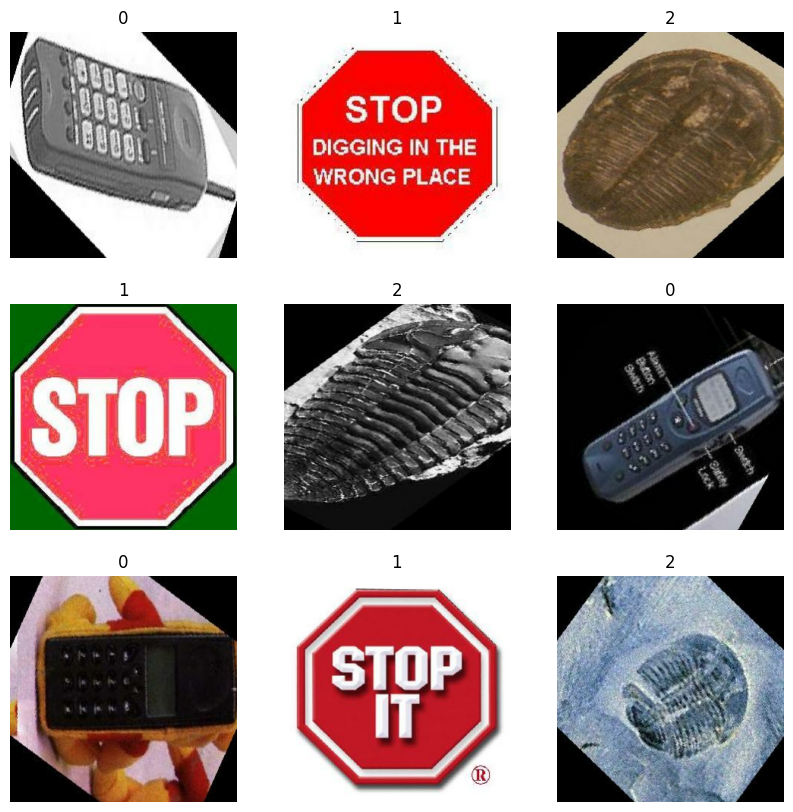

In [68]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

мда

In [69]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/cat_dog", 
    validation_split=0.2, 
    subset="both", 
    seed=42, 
    image_size=(100,100), 
    batch_size=64, 
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Using 400 files for validation.


In [70]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
    ]
)

In [71]:
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label)
)

In [72]:
layers_dims = np.array([5, 4, 1])
activations = np.array(['relu', 'relu', 'sigmoid'])

In [73]:
Conv_nn = Conv_neural_net()

for images, labels in train_ds.take(1):
    Conv_nn.fit(images.numpy(), np.array([labels.numpy()]), layers_dims = layers_dims, activations = activations)

epoch 0________________________ 0.6931471805594841
epoch 1________________________ 0.6930746250132773
epoch 2________________________ 0.693004764790174
epoch 3________________________ 0.692937499751801
epoch 4________________________ 0.692872733484815
epoch 5________________________ 0.692810373142255
epoch 6________________________ 0.6927503293158955
epoch 7________________________ 0.692692515938729
epoch 8________________________ 0.6926368501099686
epoch 9________________________ 0.6925832520364826


In [74]:
for images, labels in test_ds.take(1):
    preds = Conv_nn.predict(images.numpy(), np.array([labels.numpy()]))

0.4375
